In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import nltk


In [2]:
stopwords = set(STOPWORDS)

In [3]:
RESOURCE_DIR = "../resources/"
CSV_FILE = f"{RESOURCE_DIR}/Reproducibility Survey EACL'21 - Annotated Bibliography - 47 papers from ACL Anthology.csv"
EXCEL_FILE = f"{RESOURCE_DIR}/Reproducibility Survey EACL'21 - Annotated Bibliography.xlsx"
SAVE_DIR = f"../figures/"

In [4]:
def get_df(csv_path):
    df = pd.read_csv(csv_path)
    return df
#     with open(csv_path) as file_h:
#         turns = file_h.read().splitlines()
#     turns = pd.Series(turns)
#     return turns


In [5]:
def plot_wordcloud(text, filepath):
    
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=70, min_font_size = 5,
                          max_words=60,
                          background_color="white", relative_scaling=1.0).generate(text)
#     max_font_size=50, max_words=100, background_color="white"
    # max_font_size = 20, min_font_size = 10, colormap="Oranges_r", width=480, height=480,
    # max_words=100, mask=transformed_wine_mask, contour_width=3, contour_color='firebrick',
    # background_color="white", mode="RGBA")
    fig = plt.figure()
    # plt.figure(figsize=[20, 10])
    plt.imshow(wordcloud)
    # plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # plt.margins(x=0, y=0)
    plt.show()
    # fig.savefig(rel_path)
    wordcloud.to_file(filepath)


In [12]:
# Pandas helpers from 
# https://gist.github.com/shubhamagarwal92/13e2c41d09156c3810740d7697a883d1
def get_column_names(df):
    return df.columns.values

In [15]:
df = get_df(CSV_FILE)
print(df)
get_column_names(df)

                                               bibtex  \
0   @inproceedings{schwartz-2010-reproducible,\n  ...   
1   @inproceedings{fokkens-etal-2013-offspring,\n ...   
2   @inproceedings{roy-etal-2014-tvd,\n    title =...   
3   @inproceedings{borgholt-etal-2015-rating,\n   ...   
4   @inproceedings{neveol-etal-2016-replicability,...   
5   @inproceedings{fares-etal-2017-word,\n    titl...   
6   @inproceedings{dakota-kubler-2017-towards,\n  ...   
7   @article{dror-etal-2017-replicability,\n    ti...   
8   @inproceedings{marrese-taylor-matsuo-2017-repl...   
9   @inproceedings{horsmann-zesch-2017-lstms,\n   ...   
10  @inproceedings{morey-etal-2017-much,\n    titl...   
11  @inproceedings{htut-etal-2018-grammar,\n    ti...   
12  @article{crane-2018-questionable,\n    title =...   
13  @inproceedings{branco-2018-depleting,\n    tit...   
14  @inproceedings{cohen-etal-2018-three,\n    tit...   
15  @inproceedings{gartner-etal-2018-preserving,\n...   
16  @inproceedings{horsmann-zes

array(['bibtex', 'Authors', 'Title', 'Year', 'Venue', 'Abbr venue',
       'Abstract',
       'Notes, e.g. findings, important points, etc. not made in abstract',
       'Links'], dtype=object)

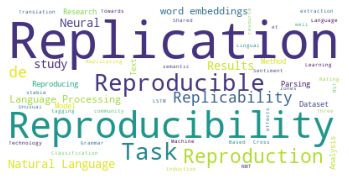

In [24]:
title_df = df["Title"]
title_df = title_df.dropna()
# print(title_df)

text = " ".join(str(title).strip("{").strip("}").strip("\\").strip("'e") for title in df.Title)
# print(text)

title_text = " ".join(title_df)

filepath = f"{SAVE_DIR}/title_wordcloud.png"
plot_wordcloud(title_text, filepath=filepath)


In [34]:
# SA: last is NaN
year_venue_df = df[["Venue", "Abbr venue"]][:-1]
year_venue_df.columns = ["year", "venue"]
print(type(year_venue_df["year"]))
year_venue_df.year = year_venue_df.year.astype(int)
year_venue_df

<class 'pandas.core.series.Series'>


,year,venue
0,2010,WS
1,2013,ACL
2,2014,LREC
3,2015,EMNLP
4,2016,WS
5,2017,WS
6,2017,WS
7,2017,TACL
8,2017,EACL
9,2017,EMNLP


/anaconda3/envs/dstc9/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


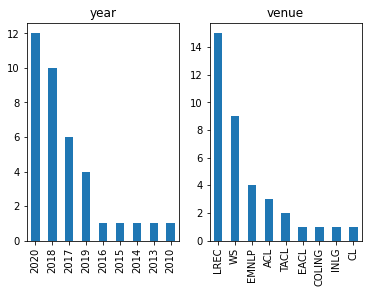

In [52]:
# https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
categorical_features = ["year", "venue"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(year_venue_df[categorical_features]):
    year_venue_df[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()
save_filepath = f"{SAVE_DIR}/side_by_side_bar.png"
fig.savefig(save_filepath)   # save the figure to file
plt.close(fig)    # close the figure window

<Figure size 10440x10440 with 0 Axes>

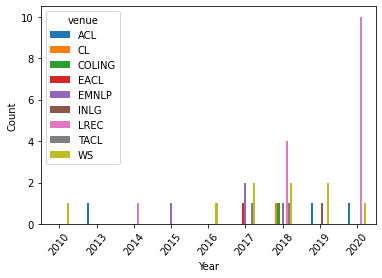

In [56]:
plt.figure(figsize=(145,145))
# country = year_venue_df.groupby("year")
# country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
pd.crosstab(year_venue_df['year'],year_venue_df['venue']).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Count")
save_filepath = f"{SAVE_DIR}/crosstab.png"
plt.savefig(save_filepath)
plt.show()

In [50]:
# ----------------------------------------------------------------

<AxesSubplot:>

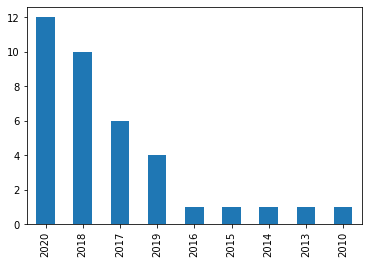

In [43]:
year_venue_df['year'].value_counts().plot(kind='bar')

<AxesSubplot:>

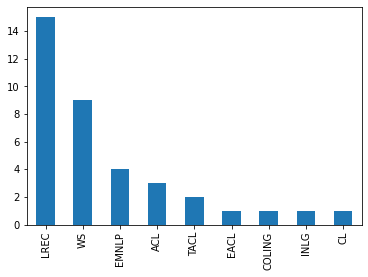

In [41]:
year_venue_df['venue'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='year'>

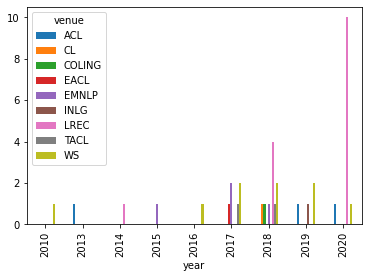

In [36]:
pd.crosstab(year_venue_df['year'],year_venue_df['venue']).plot.bar()

<AxesSubplot:xlabel='venue'>

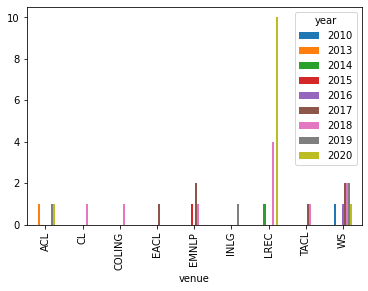

In [37]:
pd.crosstab(year_venue_df['venue'],year_venue_df['year']).plot.bar()